# Import Libraries and Create Circle Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Importing Data Set
#Let use math package and function to create circles
import math
np.random.seed(42)

# Function for creating datapoints in the form of circle 
def PointsInCircum(r,n=100):
#Create point in Circumference define own function def 
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]


In [3]:
# Creating data points in the form of circle
df = pd.DataFrame(PointsInCircum(500,1000)) # 1000 data points
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\aksha\AppData\Local\Temp\ipykernel_9272\494422543.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(300,700))
C:\Users\aksha\AppData\Local\Temp\ipykernel_9272\494422543.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(100,300))
C:\Users\aksha\AppData\Local\Temp\ipykernel_9272\494422543.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [4]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


# Raw Circle Data

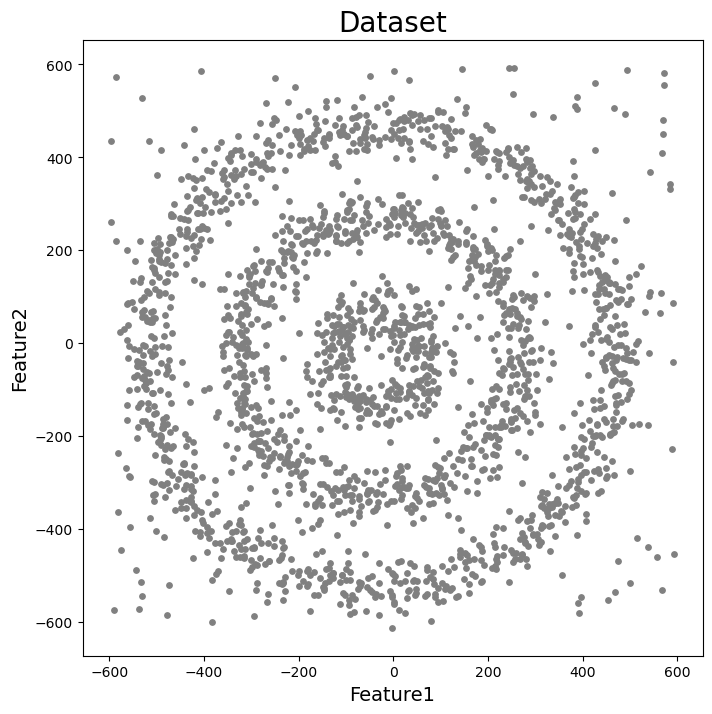

In [5]:
#Plot the Points
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.ylabel('Feature2',fontsize=14)
plt.show()

# Try All Clustering Algo on Circle Data (KMeans, Hierarchical, DBSCAN Without Parameter) But not showing Correct noise

In [ ]:
# K Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df[[0,1]])

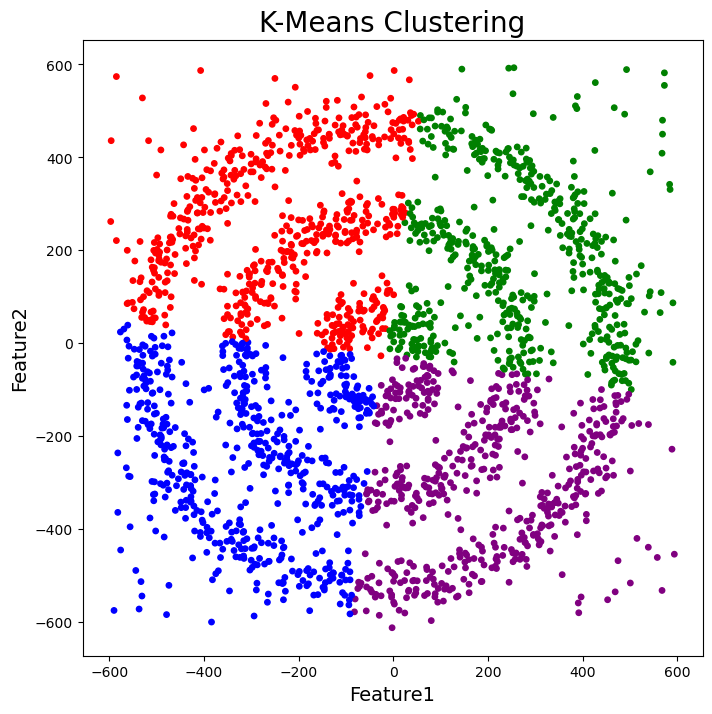

In [9]:
df['KMeans_labels']=kmeans.labels_

# Plotting resulting cluster of K_Means
Colors = ['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(Colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.ylabel('Feature2',fontsize=14)
plt.show()

In [14]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
hc.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

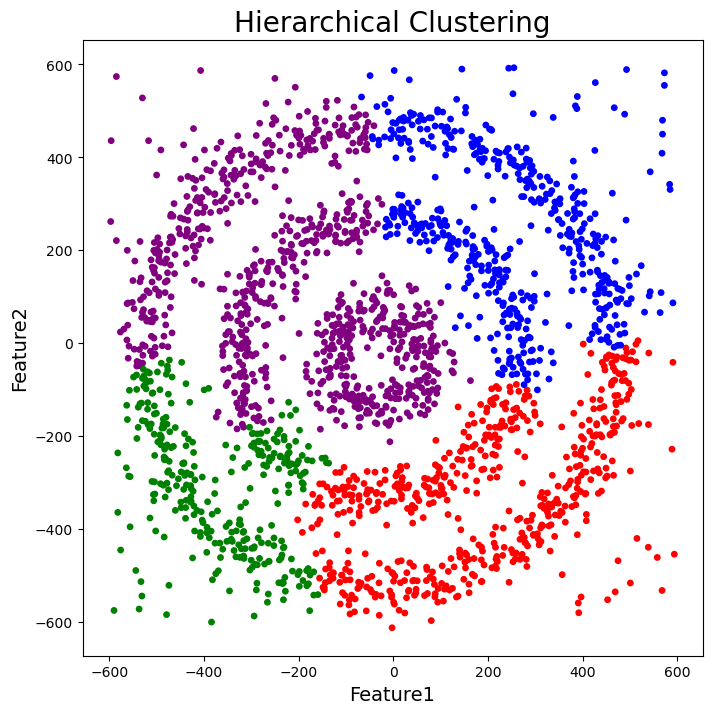

In [15]:
df['HR_labels']=hc.labels_

# Plotting resulting cluster of Hierarchical clustering
Colors = ['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(Colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.ylabel('Feature2',fontsize=14)
plt.show()

In [16]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

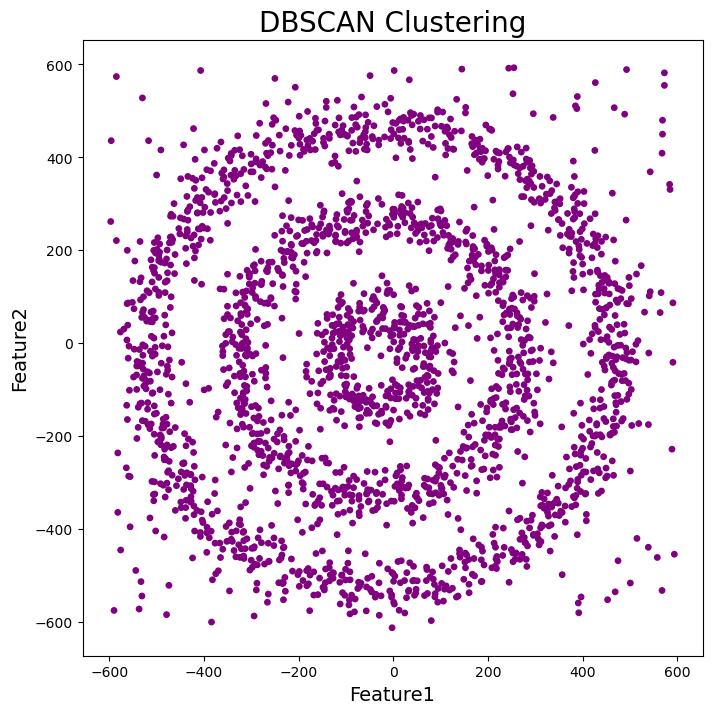

In [18]:
df['DBSCAN_labels']=dbscan.labels_

# Plotting resulting cluster of Hierarchical clustering
Colors = ['purple','red','blue','green']
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(Colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.ylabel('Feature2',fontsize=14)
plt.show()

# DBSCAN With epslon and min_points

In [20]:
# Finding out epslon
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances , indices = nbrs.kneighbors(df[[0,1]])

In [21]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [22]:
len(distances)

2300

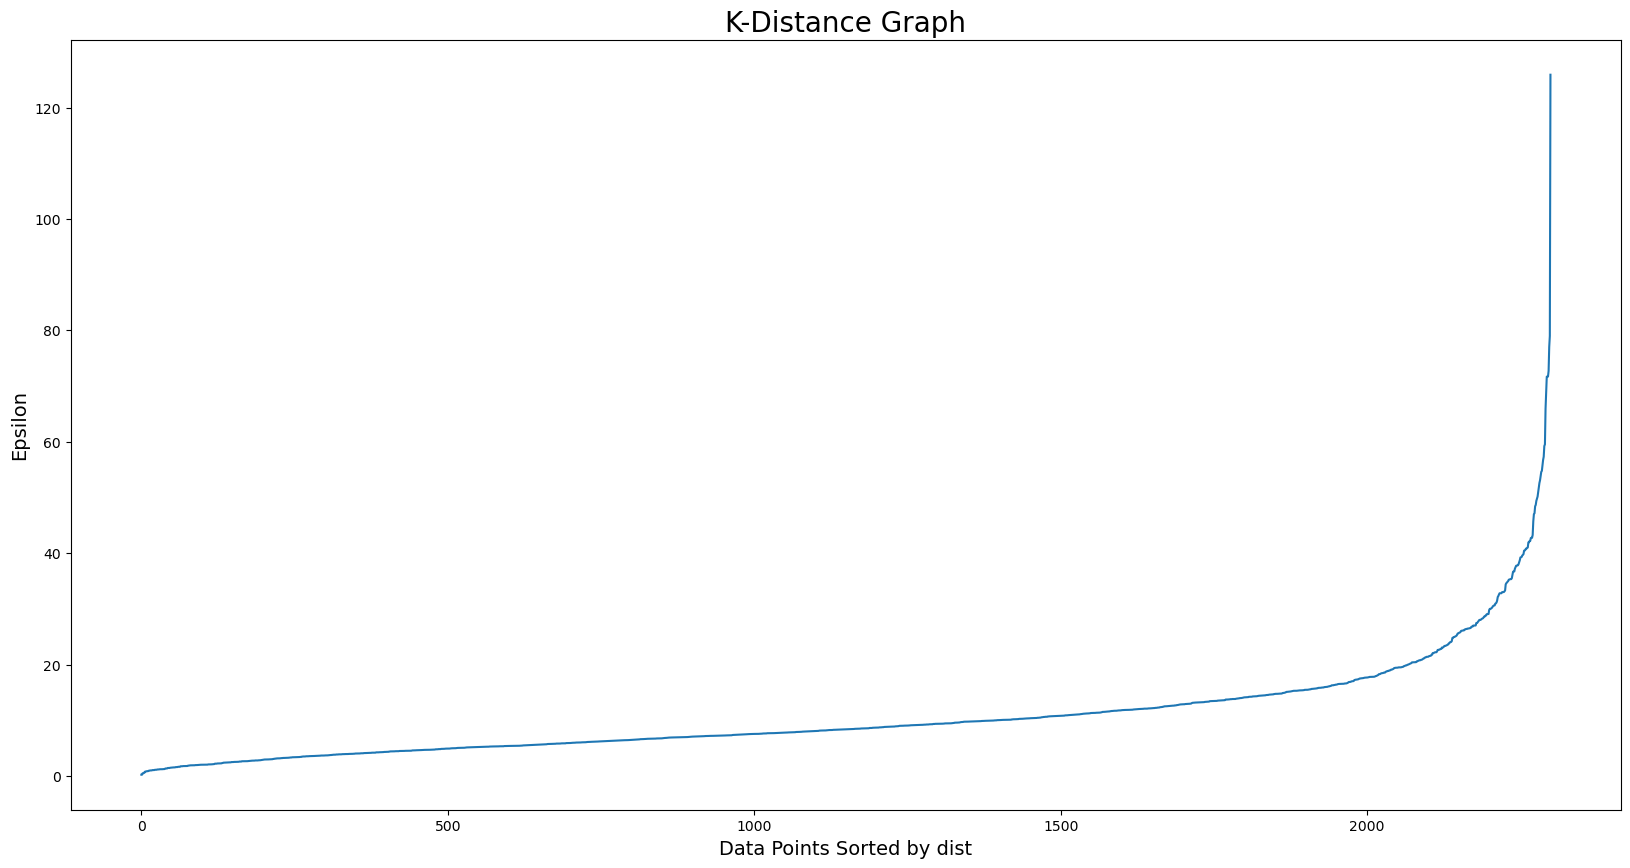

In [23]:
# Plotting K Distances Graph
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-Distance Graph',fontsize=20)
plt.xlabel('Data Points Sorted by dist',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [26]:
#DBSCAN With both Parameter
from sklearn.cluster import DBSCAN
dbscan_opt = DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [28]:
df['DBSCAN_opt_labels']= dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

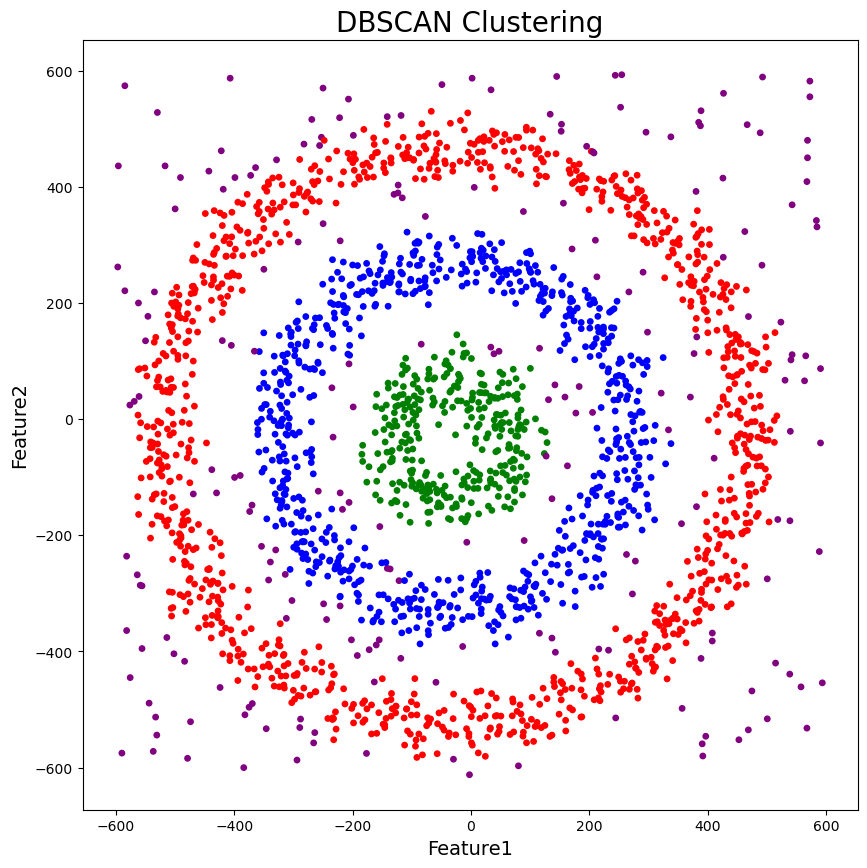

In [29]:
# Plotting resulting cluster of DBSCAN clustering
Colors = ['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(Colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature1',fontsize=14)
plt.ylabel('Feature2',fontsize=14)
plt.show()